In [13]:
# Célula 1: Imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from questao_02 import metodo_bisseccao


In [14]:
# Célula 2: Dados do Circuito RLC
L = 5.0           
C = 1e-4          
t_alvo = 0.05     
razao_alvo = 0.01 # 1% da carga inicial

def equacao_circuito(R):
    """
    Função f(R) que queremos zerar.
    Representa: (Carga calculada / Carga inicial) - 0.01
    """

    alpha = R / (2 * L)
    omega0_sq = 1 / (L * C)
    discriminante = omega0_sq - alpha**2

    # evita raiz de negativo
    if discriminante < 0:
        return 1000.0 
        
    omega = np.sqrt(discriminante)
    
    # Equação 
    return np.exp(-alpha * t_alvo) * np.cos(omega * t_alvo) - razao_alvo

Teste de Sinais: f(0) = -0.63 | f(400) = 0.06

RESPOSTA FINAL:
Resistência R = 328.1515 Ohms
Erro residual = 8.27e-08


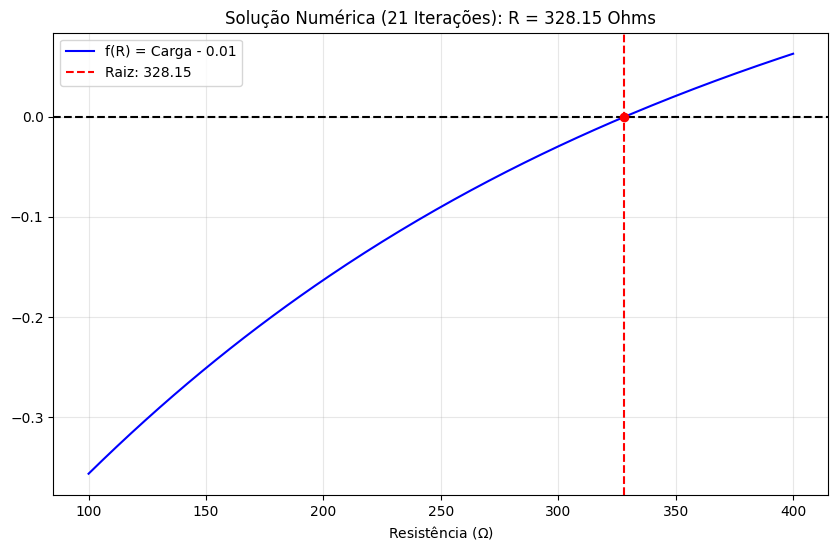

In [15]:
# Célula 3: Rodando a Bisseção e Plotando
# intervalo inicial
a = 0
b = 400 

try:
    # para ver os sinais
    val_a = equacao_circuito(a)
    val_b = equacao_circuito(b)
    print(f"Teste de Sinais: f({a}) = {val_a:.2f} | f({b}) = {val_b:.2f}")
    
    if val_a * val_b >= 0:
        print("ALERTA: O intervalo ainda é ruim! Tente aumentar 'b'.")
    else:
        # Chama a função
        R_final, historico = metodo_bisseccao(equacao_circuito, a, b, iteracoes=21)

        print(f"\nRESPOSTA FINAL:")
        print(f"Resistência R = {R_final:.4f} Ohms")
        print(f"Erro residual = {equacao_circuito(R_final):.2e}")

        # Gráfico 
        plt.figure(figsize=(10, 6))
        
        x_vals = np.linspace(100, 400, 200) 
        y_vals = [equacao_circuito(r) for r in x_vals]
        
        plt.plot(x_vals, y_vals, label='f(R) = Carga - 0.01', color='blue')
        plt.axhline(0, color='black', linestyle='--')
        plt.axvline(R_final, color='red', linestyle='--', label=f'Raiz: {R_final:.2f}')
        plt.scatter(R_final, 0, color='red', zorder=5)
        
        plt.title(f"Solução Numérica (21 Iterações): R = {R_final:.2f} Ohms")
        
        # 
        plt.xlabel(r"Resistência ($\Omega$)") 
        
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
except Exception as e:
    print(f"Ocorreu um erro: {e}")